Analytics

In [40]:
# Marketing Analytics Portfolio Project

# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For inline plots in Jupyter Notebook
%matplotlib inline

# Display plot styles
sns.set(style="whitegrid")


In [ ]:
# Define the file path to your Excel file
file_path = r"X:\GIT\Portfolio_Projects\Marketing Analytics\Data\ifood_df.csv"

# Read the Excel file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [ ]:
# Check the dimensions of the data and its information
print("Dataset shape:", df.shape)
df.info()

# Descriptive statistics to understand numeric features
df.describe()

# Check for missing values in each column
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# If necessary, handle missing values, e.g., fill with mean or drop rows/columns
# Example: fill missing numeric values with the column mean
df.fillna(df.mean(), inplace=True)

# Verify that missing values are addressed
print("Missing values after cleaning:\n", df.isnull().sum())


In [47]:
df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

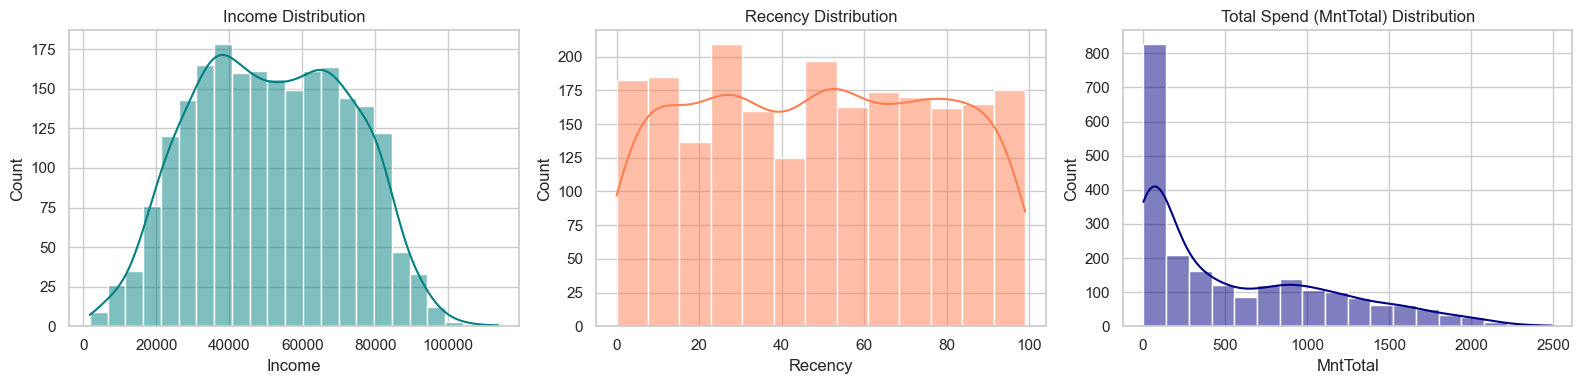

In [48]:
# %% [code]
plt.figure(figsize=(16, 4))

plt.subplot(1, 3, 1)
sns.histplot(df['Income'], kde=True, color='teal')
plt.title('Income Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['Recency'], kde=True, color='coral')
plt.title('Recency Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['MntTotal'], kde=True, color='navy')
plt.title('Total Spend (MntTotal) Distribution')

plt.tight_layout()
plt.show()


### Next, we explore relationships between key variables using scatter plots and box plots.

C:\Users\HP\AppData\Local\Temp\ipykernel_23336\3211868212.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='AcceptedCmpOverall', y='MntTotal', data=df, palette='Set2')


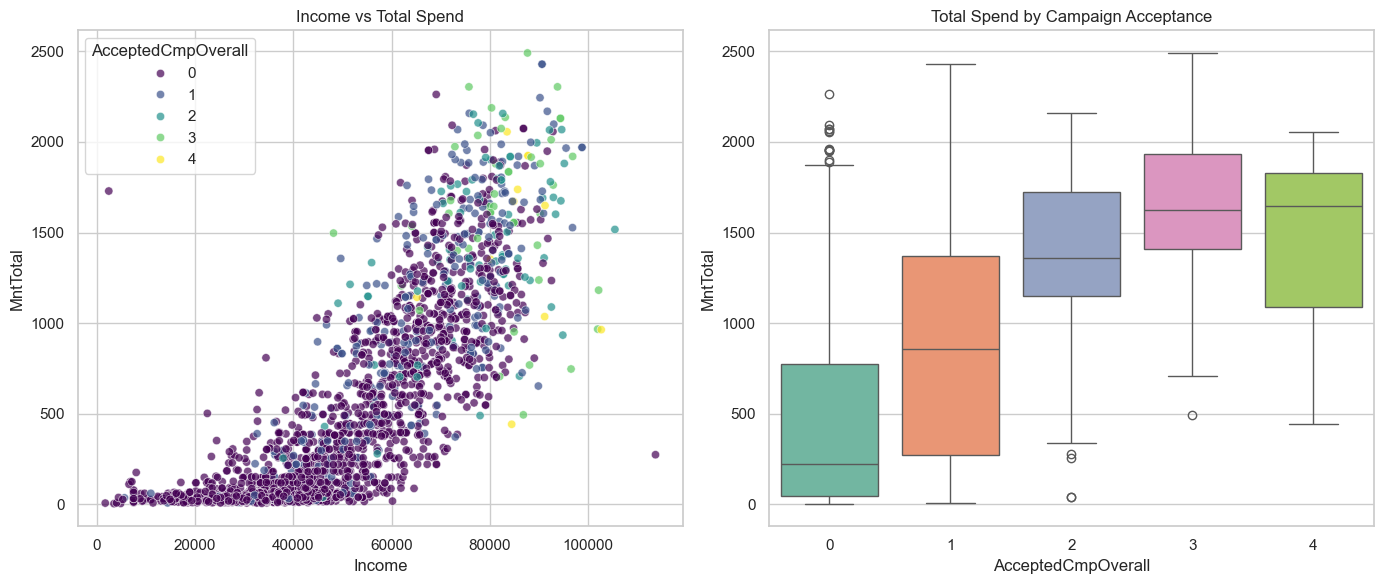

In [ ]:
plt.figure(figsize=(14, 6))

# Scatter plot: Income vs Total Spend
plt.subplot(1, 2, 1)
sns.scatterplot(x='Income', y='MntTotal', data=df, hue='AcceptedCmpOverall', palette='viridis', alpha=0.7)
plt.title('Income vs Total Spend')
plt.xlabel('Income')
plt.ylabel('MntTotal')

# Box plot: Distribution of Total Spend by Campaign Acceptance
plt.subplot(1, 2, 2)
sns.boxplot(x='AcceptedCmpOverall', y='MntTotal', data=df, palette='Set2')
plt.title('Total Spend by Campaign Acceptance')
plt.xlabel('AcceptedCmpOverall')
plt.ylabel('MntTotal')

plt.tight_layout()
plt.show()

# 3.3. Correlation Analysis
### A correlation matrix helps to identify relationships between numerical variables.


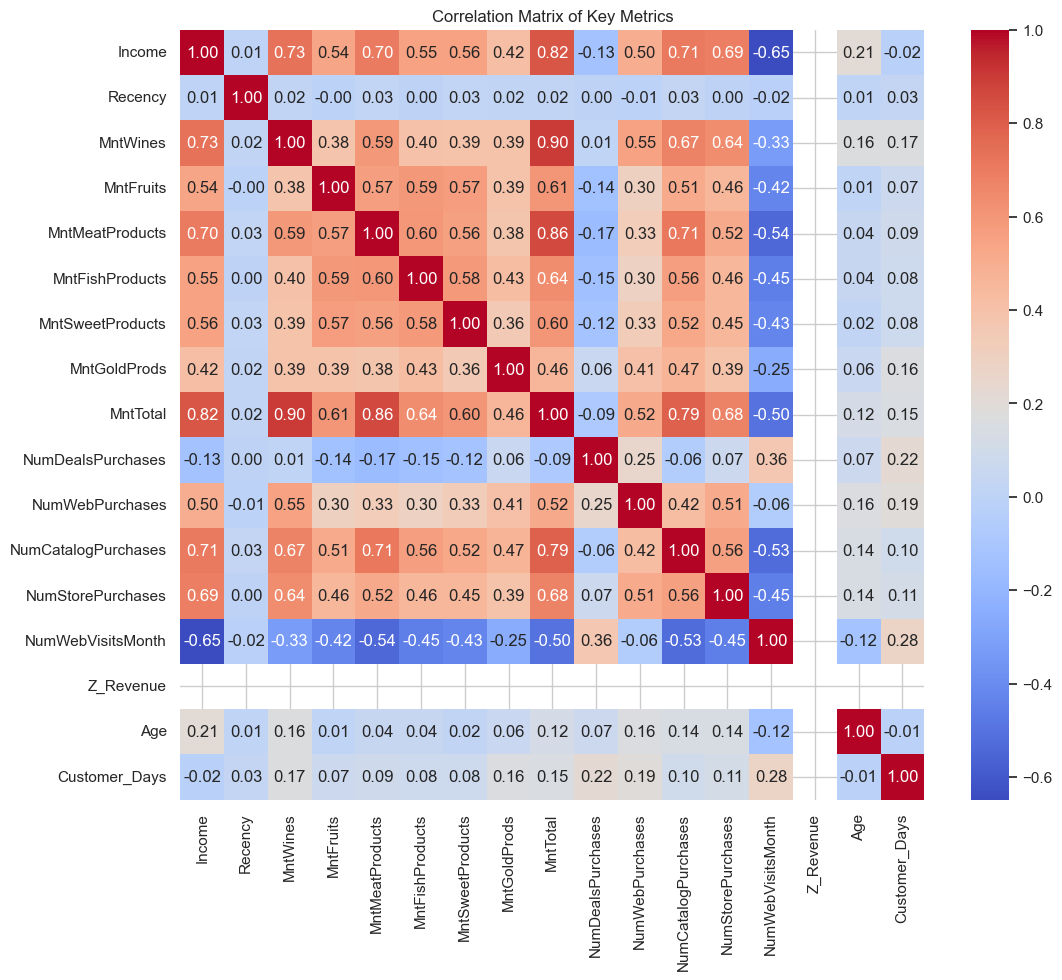

In [55]:
# Select key numeric columns for correlation analysis
cols_for_corr = ['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 
                 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'MntTotal', 
                 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
                 'NumStorePurchases', 'NumWebVisitsMonth', 'Z_Revenue', 'Age', 'Customer_Days']

corr_matrix = df[cols_for_corr].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Key Metrics')
plt.show()


## 4. Advanced Business Analytics
### Here we apply advanced techniques to extract deeper insights.
## 4.1. Customer Segmentation with K-Means Clustering
### We segment customers based on features such as Income, Recency, MntTotal, and Age. This can help identify different customer groups for targeted marketing.

c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1

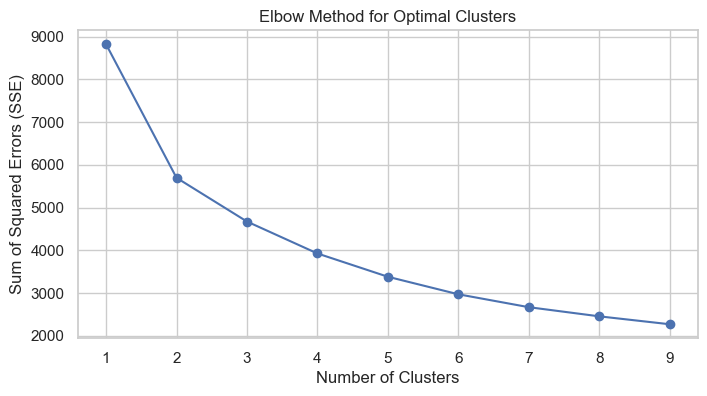

c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select features for clustering
cluster_features = df[['Income', 'Recency', 'MntTotal', 'Age']].dropna()

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(cluster_features)

# Use the elbow method to determine the optimal number of clusters
sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 10), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

# Assume from the elbow plot that 3 clusters is optimal
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(features_scaled)

# Add cluster labels to the DataFrame
df['Customer_Segment'] = np.nan
df.loc[cluster_features.index, 'Customer_Segment'] = cluster_labels


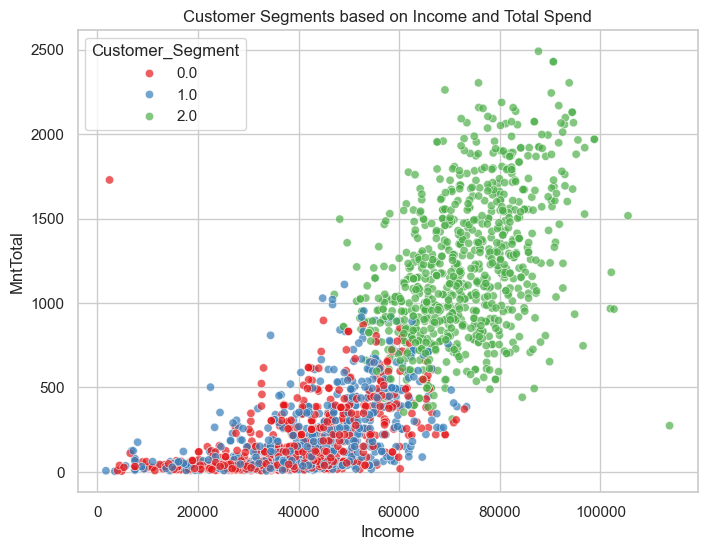

In [52]:
# Visualize the clusters: Income vs MntTotal colored by cluster
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Income', y='MntTotal', data=df, hue='Customer_Segment', palette='Set1', alpha=0.7)
plt.title('Customer Segments based on Income and Total Spend')
plt.xlabel('Income')
plt.ylabel('MntTotal')
plt.show()


## 4.2. Predictive Modeling: Regression Analysis
# 
### Next, we build a regression model to predict revenue (Z_Revenue) based on features like Income, Recency, and MntTotal.
# 
### This model can help estimate the expected revenue from a customer based on their profile and purchasing behavior.

Regression Mean Squared Error: 0.0
Regression R-squared: 1.0


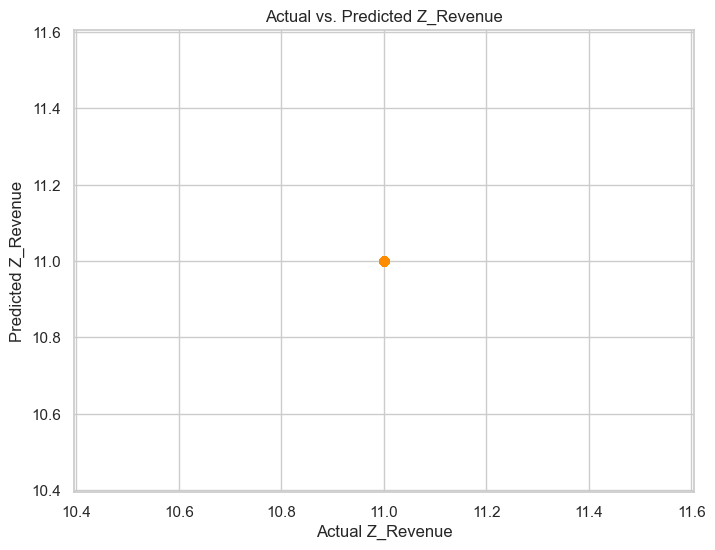

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the data for regression
regression_data = df[['Income', 'Recency', 'MntTotal', 'Z_Revenue']].dropna()
X = regression_data[['Income', 'Recency', 'MntTotal']]
y = regression_data['Z_Revenue']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the regression model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = reg_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Regression Mean Squared Error:", mse)
print("Regression R-squared:", r2)

# Plot actual vs. predicted revenue
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='darkorange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Z_Revenue')
plt.ylabel('Predicted Z_Revenue')
plt.title('Actual vs. Predicted Z_Revenue')
plt.show()


## 5. Business Insights and Conclusions
# Key Findings:
#### - **Customer Spending & Income:** The distribution plots indicate varied income levels and spending behaviors. Customers with higher incomes tend to have higher total spend (MntTotal).
#### - **Recency Impact:** Recency shows a spread that may indicate different engagement levels. Customers who purchased recently might be more responsive to new campaigns.
#### - **Campaign Effectiveness:** Box plots suggest differences in total spend between customers who accepted campaigns versus those who did not.
#### - **Segmentation:** The clustering analysis segmented customers into distinct groups. For example, one segment might represent high-income, high-spend customers while another may show a more budget-conscious profile. This segmentation can help tailor personalized marketing strategies.
#### - **Predictive Modeling:** The regression model indicates that Income, Recency, and MntTotal are significant predictors of revenue (Z_Revenue). These insights can inform budget allocations and customer engagement efforts.